### Group C Member: 
    Zhenning Li (B00780786)
    Yixin Zhao (B00780592)
    Miao Wang (B00761718)
    Jiaqian Ma (B00782247)

In [33]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
from statsmodels.stats.outliers_influence import summary_table
from scipy.stats import norm
from scipy.stats import t
from scipy import stats

# I. Summary statistics

In [3]:
url = 'https://raw.githubusercontent.com/adufays/GDP_expectancy/main/APM_Returns.csv'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df = df.drop('Unnamed: 0', axis = 1)
df.iloc[:,:10]

,Date,Mkt-RF,SMB,HML,RMW,CMA...6,MMM,ABT,ATVI,ADBE
0,2000/01,-4.74,4.15,-0.29,-6.05,4.73,-1.20,-7.37,-5.35,-16.43
1,2000/02,2.45,18.32,-9.93,-18.33,-0.51,-6.24,0.91,-19.23,84.81
2,2000/03,5.20,-14.91,7.38,11.68,-1.05,-0.04,6.16,-5.40,8.66
3,2000/04,-6.40,-5.55,8.61,7.55,5.27,-2.65,8.78,-48.65,8.19
4,2000/05,-4.42,-3.68,2.56,4.63,0.74,-1.51,5.35,-1.50,-7.43
...,...,...,...,...,...,...,...,...,...,...
205,2017/02,3.57,-2.12,-1.79,0.78,-1.72,6.56,7.88,12.20,4.33
206,2017/03,0.17,0.78,-3.17,0.68,-1.00,2.64,-1.52,10.45,9.93
207,2017/04,1.09,0.49,-1.87,2.00,-1.55,2.30,-1.78,4.74,2.72
208,2017/05,1.06,-3.05,-3.78,1.21,-1.88,4.35,4.57,12.05,6.01


## 1.1 Computing monthly average return and standard deviation

In [4]:
df_1 = df.iloc[:,6:]

In [5]:
asset_name_list = list(df_1.columns)

# we used describe() function to generate dataframes 
# of average return and standard deviation

asset_average_return_list = list(df_1.describe().iloc[1])
asset_standard_deviation_list = list(df_1.describe().iloc[2])
df_1.describe().iloc[:, :7]

,MMM,ABT,ATVI,ADBE,AES,AET,AMG
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.734286,0.572381,2.379476,1.569095,0.488429,1.784286,1.396762
std,5.661786,5.714191,12.059177,11.942540,14.581512,9.353504,10.969253
min,-15.500000,-20.870000,-48.650000,-33.860000,-62.330000,-31.210000,-44.100000
25%,-2.592500,-2.625000,-3.460000,-4.582500,-5.452500,-3.870000,-4.190000
50%,0.955000,0.950000,2.265000,2.710000,-0.665000,2.495000,1.930000
75%,3.885000,4.520000,7.800000,7.600000,6.417500,6.905000,6.677500
max,20.150000,13.820000,59.500000,84.810000,74.290000,34.480000,49.710000


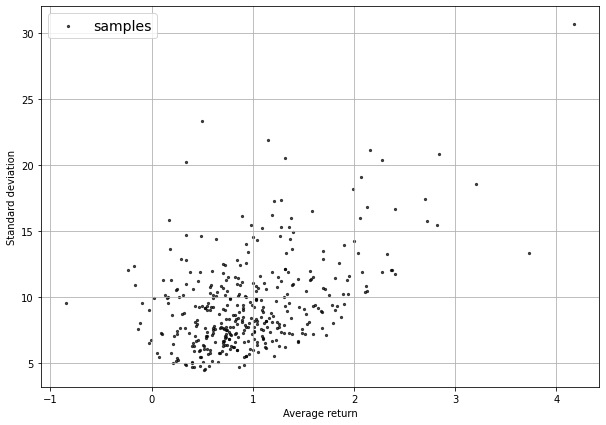

In [6]:
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.scatter(asset_average_return_list, asset_standard_deviation_list, c = 'black', s = 5, 
            alpha = 0.7, label = 'samples')

plt.grid()
plt.legend(fontsize = 14)

plt.xlabel('Average return')
plt.ylabel('Standard deviation')
plt.show()

## 1.2 Use OLS to estimate the model

The model is: $std_{i} = \beta_{1} + \beta_{2}\times ave_{i} + \epsilon_{i}$

In [7]:
ave = np.array(asset_average_return_list)
std = np.array(asset_standard_deviation_list)

x_model = sm.add_constant(ave)
y_model = std
model = sm.OLS(y_model, x_model)
result = model.fit()
result.params

array([6.82753557, 2.65556998])

Here, $\hat \beta_{1} = 6.82753557$, and $\hat \beta_{2} = 2.65556998 $

$std_{i} = 6.83 + 2.66\times ave_{i} $

## 1.3 Interpret the coefficient $\beta_{2}$

The literal interpretation of the estimated coefficient $\beta_{2}$ is that a one-unit increase in $ave_{i}$ (asset average return) will produce an expected increase in $std_{i}$ (asset standard deviation)of $\beta_{2}$=2.66 units.

## 1.4 Scatter plot with regression line

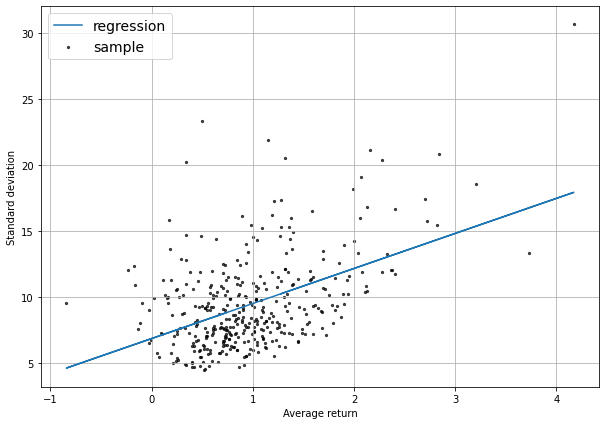

In [8]:
x_reg= np.asarray(asset_average_return_list)
y_reg = result.params[0] + result.params[1]*x_reg

plt.scatter(asset_average_return_list, asset_standard_deviation_list, c = 'black', 
            s = 5, alpha = 0.7, label = 'sample')

plt.xlabel('Average return')
plt.ylabel('Standard deviation')

plt.plot(x_reg, y_reg, label = 'regression')
plt.grid()
plt.legend(fontsize = 14)
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.show()

## 1.5 Write explicit mathematical formula for the estimators

$\hat \beta_{2} = \frac{\sum_{t=1}^{T}\left(x_{t}-\bar{x}\right)\left(y_{t}-\bar{y}\right)}{\sum_{t=1}^{T}\left(x_{t}-\bar{x}\right)^{2}} =\frac{cov(ave, std)}{var(ave)}$ 

$\hat \beta_{1} = average(std) - \hat \beta_{2} * average(ave)$

## 1.6 Is Beta2 statistically significant? Perform a hypothesis testing

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     107.4
Date:                Fri, 28 May 2021   Prob (F-statistic):           2.47e-22
Time:                        18:07:44   Log-Likelihood:                -975.32
No. Observations:                 384   AIC:                             1955.
Df Residuals:                     382   BIC:                             1963.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8275      0.293     23.303      0.000       6.251       7.404
x1             2.6556      0.256     10.361      0.000       2.152       3.160
==============================================================================
Omnibus:                      108.212   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.712
Skew:                           1.405   Prob(JB):                     2.97e-56
Kurtosis:                       5.844   Cond. No.                         3.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the table above, we can see for $\beta{2}$, the t-value is 10.361, and $P>|t|$ is nearly $0$, thus we can say $\beta{2}$ is statistically significant.

We can also calculate t-value by using the formula:

In [10]:
y = np.array(asset_standard_deviation_list)
y_reg = result.params[0] + result.params[1]*np.array(asset_average_return_list)

residual_square = (np.square(y-y_reg)).sum()/(len(y)-2)
x_variance = np.var(asset_average_return_list)
x_error = x_variance*(len(np.array(asset_average_return_list))-1)

t = 2.656/(math.sqrt(residual_square/x_error))
t

10.349174525454748

$H_{0}$: $\beta_{2} = 0$

$H_{1}$: $\beta_{2} \neq 0$

Test statistic: $t_{\beta_{2}}=\frac{2.656-0}{SE} = \frac{2.6556-0}{0.2563} = 10.36$ 

$P-value = 2[1-p(t_{382}\leq t_{\beta_{2}})] = 0 < 5\% $ 

We should reject the null hypothesis $\beta_{2}=0 $. 

$\beta_{2}=2.656$ is thus statistically significant.

# II. Linear Regression

In [11]:
url = 'https://raw.githubusercontent.com/adufays/GDP_expectancy/main/life_gdp.csv'
s = requests.get(url).content
df_2 = pd.read_csv(io.StringIO(s.decode('utf-8')))

## 2.1 Scatter plot x-y model

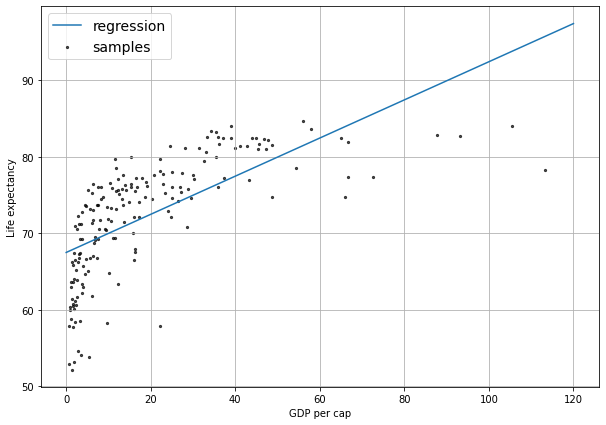

In [12]:
plt.scatter(df_2['GDPpcap'], df_2['Life exp.'], c = 'black', s = 5, 
            alpha = 0.7, label = 'samples')

slope, intercept, r_value, p_value, std_err = stats.linregress(df_2['GDPpcap'], 
                                                               df_2['Life exp.'])

x_reg_1= np.linspace(0, 120, 10)
y_reg_1 = intercept + slope*x_reg_1
plt.plot(x_reg_1, y_reg_1, label = 'regression')

plt.grid()
plt.legend(fontsize = 14)
plt.xlabel('GDP per cap')
plt.ylabel('Life expectancy')
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.show()

## 2.2 Scatter plot logx-y model

In [13]:
life_exp_list = np.array(df_2['Life exp.'])
GDP_list = np.array(df_2['GDPpcap'])
GDP_list_log = np.log(GDP_list)

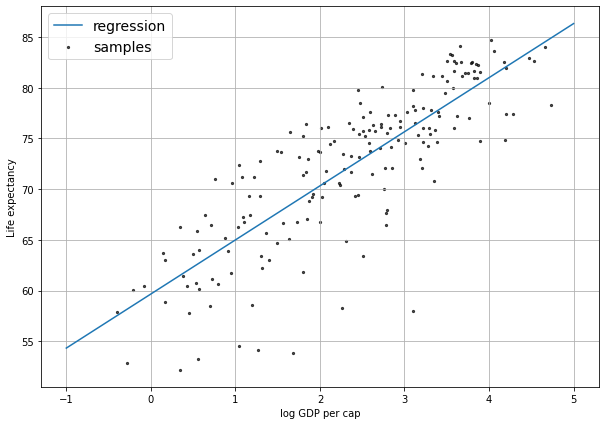

In [14]:
plt.scatter(GDP_list_log, life_exp_list, c = 'black', s = 5, 
            alpha = 0.7, label = 'samples')

slope, intercept, r_value, p_value, std_err = stats.linregress(GDP_list_log, 
                                                               life_exp_list)

x_reg_2= np.linspace(-1, 5, 10)
y_reg_2 = intercept + slope*x_reg_2
plt.plot(x_reg_2, y_reg_2, label = 'regression')

plt.grid()
plt.legend(fontsize = 14)
plt.rcParams['figure.figsize'] = (10.0, 7.0)

plt.xlabel('log GDP per cap')
plt.ylabel('Life expectancy')
plt.show()

## 2.3 Coefficient of determination

### x-y model

In [15]:
x = np.array(df_2['GDPpcap'])
y = np.array(df_2['Life exp.'])

x_model = sm.add_constant(x)
y_model = y
model_2 = sm.OLS(y_model, x_model)
result_2 = model_2.fit()

In [16]:
result_2.params

array([67.51367284,  0.24932456])

In [17]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     142.4
Date:                Fri, 28 May 2021   Prob (F-statistic):           1.47e-24
Time:                        18:07:45   Log-Likelihood:                -574.97
No. Observations:                 182   AIC:                             1154.
Df Residuals:                     180   BIC:                             1160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.5137      0.585    115.478      0.000      66.360      68.667
x1             0.2493      0.021     11.933      0.000       0.208       0.291
==============================================================================
Omnibus:                       22.094   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.566
Skew:                          -0.925   Prob(JB):                     1.70e-06
Kurtosis:                       3.285   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted coefficient of determination for x-y model $R^2_{x}$ is $0.439$

### lnx-y model

In [18]:
x_model = sm.add_constant(GDP_list_log)
y_model = life_exp_list
model_3 = sm.OLS(y_model, x_model)
result_3 = model_3.fit()

In [19]:
result_3.params

array([59.65932948,  5.33364812])

In [20]:
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     382.8
Date:                Fri, 28 May 2021   Prob (F-statistic):           2.00e-46
Time:                        18:07:45   Log-Likelihood:                -524.28
No. Observations:                 182   AIC:                             1053.
Df Residuals:                     180   BIC:                             1059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.6593      0.722     82.628      0.000      58.235      61.084
x1             5.3336      0.273     19.565      0.000       4.796       5.872
==============================================================================
Omnibus:                       40.029   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.168
Skew:                          -1.116   Prob(JB):                     1.58e-15
Kurtosis:                       5.002   Cond. No.                         6.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted coefficient of determination for lnx-y model $R^2_{lnx}$ is $0.678$

### Conclusion

Here we have $R^2_{x} = 0.439$ and $R^2_{lnx} = 0.678$. With x-y model, we improve the fit by 43.9% compared to the sample average, and we improve the fit by 67.8% with the lnx-y model. 

It's clear that the lnx-y model performs better. Since GDP has a long-tailed distribution (right skewed), the logarithmic transformation on GDP(x variable) reduces or removes the skewness of our original data, creating the desired asymptotic association between input (X variable )and target (Y variable) on the original input scale.

Besides, we can infer from the scatter plot that the lnx-y model has smaller error.

## 2.4 Empirical correlation between the log of GDP and life expectancy

The correlation coefficient is:

In [21]:
fanx = np.array(df_2['GDPpcap'])
x_1 = np.log(x)
y = np.array(df_2['Life exp.'])
cor = np.vstack((x_1, y))
print('The  empirical correlation is:', (np.corrcoef(cor)[0][1]))
print('The squared empirical correlation is:', (np.corrcoef(cor)[0][1])**2)
print('The coefficient of determination for lnx-y model is: ', result_3.rsquared)

The  empirical correlation is: 0.8247155249526711
The squared empirical correlation is: 0.6801556970979599
The coefficient of determination for lnx-y model is:  0.6801556970979601


The coefficient of determination is equal to the square of the empirical correlation. 

# III. Generating spurious correlation

In [22]:
url = 'https://raw.githubusercontent.com/adufays/GDP_expectancy/main/Appl_Russell.csv'
s = requests.get(url).content
df_3 = pd.read_csv(io.StringIO(s.decode('utf-8')))
df_3 = df_3.drop('Unnamed: 0', axis = 1)
df_3

,Date,Apple returns,Russell returns
0,2016-04-25,-11.989084,-1.260337
1,2016-05-02,-1.094085,-0.561795
2,2016-05-09,-1.794334,-0.581591
3,2016-05-16,5.061906,0.377336
4,2016-05-23,5.247411,2.334956
...,...,...,...
257,2021-03-29,1.465979,1.245510
258,2021-04-05,7.816477,2.372223
259,2021-04-12,0.868402,1.428772
260,2021-04-19,0.505571,-0.641943


<AxesSubplot:xlabel='Date'>

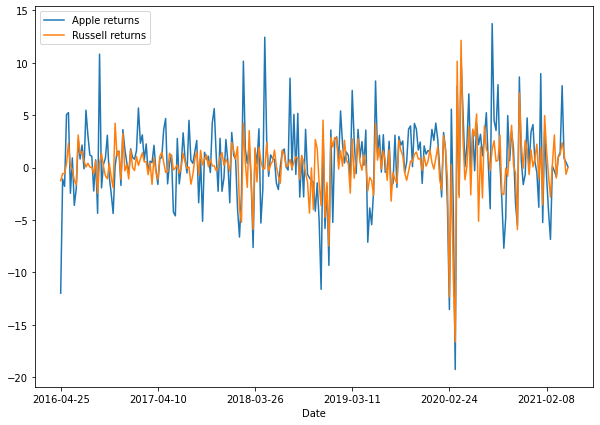

In [23]:
df_4 = df_3.set_index('Date')
df_4.plot()

## 3.1 Generate explanatory variables from Normal Distribution

In [24]:
df_explanVar = pd.DataFrame()
for i in range(1000):
    df_explanVar[i] = norm.rvs(size=262, loc=0, scale=1)
df_explanVar.iloc[:, :7]

,0,1,2,3,4,5,6
0,1.297910,0.804206,-1.103979,-0.068985,-0.415247,-0.368813,-1.151460
1,0.949897,-0.141375,-0.871852,1.291526,0.419458,-0.498054,-0.174098
2,1.216040,-0.263023,-0.141120,-1.244212,-1.805208,1.005682,0.454859
3,0.692110,-0.069647,-0.749674,0.270932,1.760037,-0.773310,1.254317
4,1.032070,0.277932,0.274575,1.272772,-0.416011,1.425553,-1.010408
...,...,...,...,...,...,...,...
257,-0.782331,-1.363049,0.971107,-0.159323,0.676408,-0.945307,-0.601152
258,-0.557416,0.606416,1.174797,0.120092,-0.875927,0.722186,-0.542585
259,-1.240483,0.434995,0.636910,1.106097,-1.190532,-0.411126,0.029605
260,2.497227,-1.754366,-0.786905,-0.505423,0.352118,-1.304097,0.417685


Now we have 1000 explanatory variables of size 262

## 3.2 Test statistics

In [25]:
y_model_1 = df_3['Apple returns']
test_statistics = []
x_for_plot = []
beta1 = []
beta2 = []
p_value_lst = []
std_err_lst = []

In [26]:
for i in range(1000):
  x_model = df_explanVar.iloc[:,i]
  slope, intercept, r_value, p_value, std_err = stats.linregress(x_model, 
                                                                 y_model_1)
  
  x_for_plot.append(i)
  test_statistics.append(slope/std_err)
  beta1.append(intercept)
  beta2.append(slope)
  p_value_lst.append(p_value)
  std_err_lst.append(std_err)

In [27]:
df_lm = pd.DataFrame(list(zip(beta1, beta2, 
                              test_statistics,
                              p_value_lst,
                              std_err_lst)), 
                     columns=["intercept", "slope", 
                              "test-statistics",
                              "p-value", 
                              "std err"])
df_lm

,intercept,slope,test-statistics,p-value,std err
0,0.647768,-0.021644,-0.089326,0.928892,0.242300
1,0.646012,-0.192805,-0.740348,0.459757,0.260425
2,0.650820,-0.230201,-0.897561,0.370250,0.256474
3,0.650115,-0.004412,-0.017935,0.985705,0.246016
4,0.661927,0.203463,0.837105,0.403302,0.243056
...,...,...,...,...,...
995,0.651106,-0.011481,-0.050252,0.959961,0.228480
996,0.630077,-0.238862,-1.019512,0.308907,0.234291
997,0.638431,-0.188627,-0.732820,0.464329,0.257399
998,0.650794,-0.068434,-0.272627,0.785356,0.251017


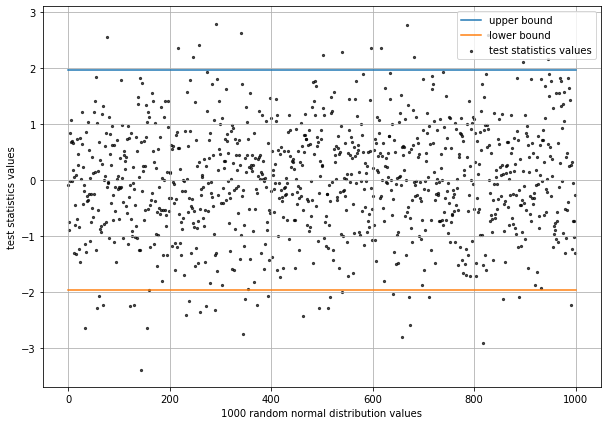

In [28]:
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.scatter(x_for_plot, test_statistics, c = 'black', s = 5, 
            alpha = 0.7, label = 'test statistics values')

plt.grid()
plt.legend(fontsize = 14)

one_line = np.linspace(0, 1000, 1000)
y_value = np.array([1.96]*1000)
plt.plot(one_line, y_value, label = 'upper bound')
y_value_2 = np.array([-1.96]*1000)
plt.plot(one_line, y_value_2, label = 'lower bound')

plt.legend(loc= 'upper right')
plt.xlabel('1000 random normal distribution values')
plt.ylabel('test statistics values')
plt.show()

Here, the test statistic formula is: 

$t=\frac{\hat{\beta}_{2}- 0}{S E(\hat{\beta}_{2})}$

where 
$SE(\hat{\beta}_{2})=\sqrt{\frac{\hat{\sigma}^{2}}{\sum_{t=1}^{T}\left(x_{t}-\bar{x}\right)^{2}}}$

## 3.3 Hypothesis test

In [29]:
maximum_t = np.absolute(np.array(test_statistics)).max()
print("So, the maximum value of test statistics is:",  maximum_t)

So, the maximum value of test statistics is: 3.378476711517529


Since $P-value = 2(1-P[t_{T-2}\leq|t|])$, we have:

In [34]:
p_value_1 = 2*(1- t.cdf(maximum_t,260))
print('P-value is: ', p_value_1)

P-value is:  0.0008406438969521535


 With the maximun value of test statistics, we got a p-value far smaller than 0.05, which indicates that we can confidently reject the Null Hypothesis that $\beta_2 = 0$ at a significant level of 95%.
 
This experiment shows that, even if we generate some random numbers, it is still possible that the result can reject the Null Hypothesis, so we cannot blindly trust the result we got and write down the conclusion without thinking.